### Importing Data & Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('train_Loan_Pred - 1724592846406.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df['Loan_Status'].value_counts()/df.shape[0]

Loan_Status
Y    0.687296
N    0.312704
Name: count, dtype: float64

### Data Cleaning

In [11]:
df.drop(columns = ['Loan_ID'],axis=1,inplace=True)

In [13]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [15]:
df['Loan_Amount_Term'].unique()/12

array([30., 10., 20., nan, 15.,  5., 25., 40.,  3.,  7.,  1.])

### Correlation Check

<Axes: >

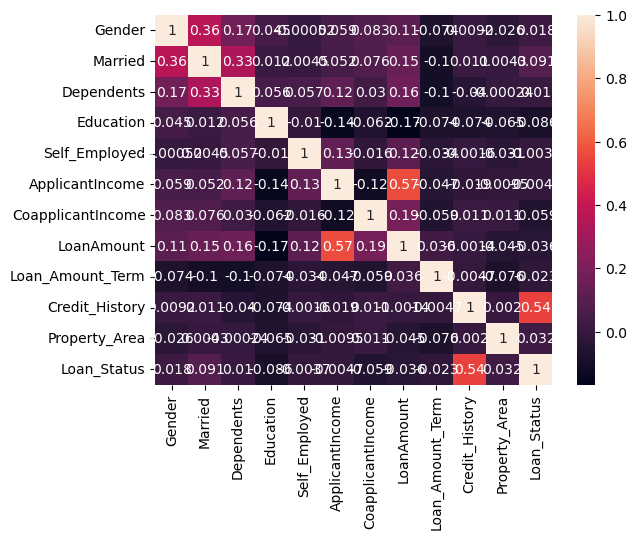

In [51]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df.shape

(614, 12)

### Null Value Handling

In [23]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df['Credit_History'].unique(),df['Dependents'].unique() ,df['Loan_Amount_Term'].unique() 

(array([ 1.,  0., nan]),
 array(['0', '1', '2', '3+', nan], dtype=object),
 array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.]))

In [27]:
val = df['Loan_Amount_Term'].mode().values[0]
val

360.0

In [29]:
df['Loan_Amount_Term'].mean(), df['Loan_Amount_Term'].mode()

(342.0,
 0    360.0
 Name: Loan_Amount_Term, dtype: float64)

In [31]:
cat_col = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
numerical_cal = ['LoanAmount']

In [33]:
for col in cat_col:
    mode_val =  df[col].mode().values[0]
    df[col].fillna(mode_val,inplace=True)
    
for col in numerical_cal:
    mean_val =  df[col].mean()
    df[col].fillna(mean_val,inplace=True)
    

C:\Users\arpit\AppData\Local\Temp\ipykernel_14568\3433155878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val,inplace=True)
C:\Users\arpit\AppData\Local\Temp\ipykernel_14568\3433155878.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [35]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Converting Categorical Into Numeric

In [41]:
from sklearn.preprocessing import LabelEncoder

In [43]:
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [45]:
label_mapping = {}
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    d = dict(zip(le.classes_,sorted(df[col].unique())))
    label_mapping.update(d)

In [47]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [49]:
label_mapping

{'Female': 0,
 'Male': 1,
 'No': 0,
 'Yes': 1,
 '0': 0,
 '1': 1,
 '2': 2,
 '3+': 3,
 'Graduate': 0,
 'Not Graduate': 1,
 'Rural': 0,
 'Semiurban': 1,
 'Urban': 2,
 'N': 0,
 'Y': 1}

### Outliers Handling

In [54]:
xx_df = df.describe()
xx_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [56]:
xx_df[xx_df.index.isin(['min','mean','max'])]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
mean,0.81759,0.653094,0.7443,0.218241,0.13355,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
min,0.00000,0.000000,0.0000,0.000000,0.00000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,3.0000,1.000000,1.00000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<Axes: ylabel='LoanAmount'>

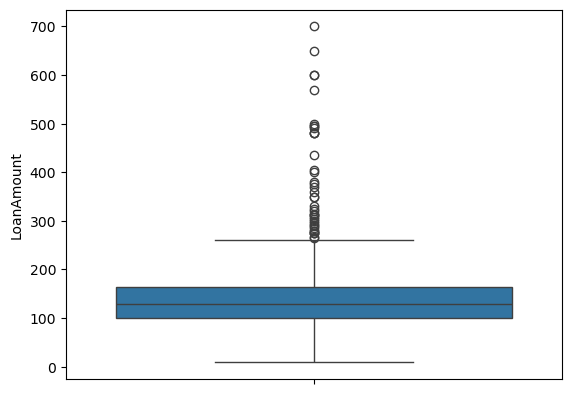

In [58]:
sns.boxplot(df['LoanAmount'])

<Axes: ylabel='ApplicantIncome'>

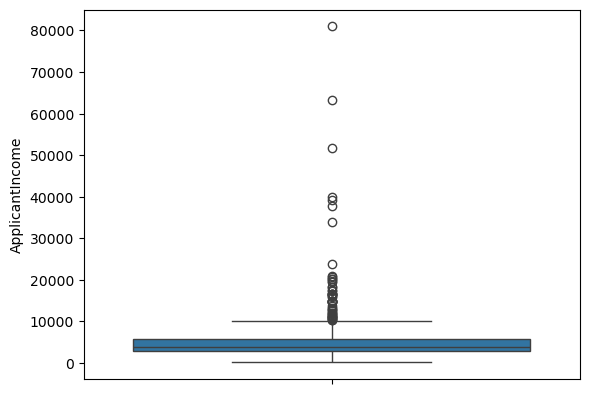

In [57]:
sns.boxplot(df['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

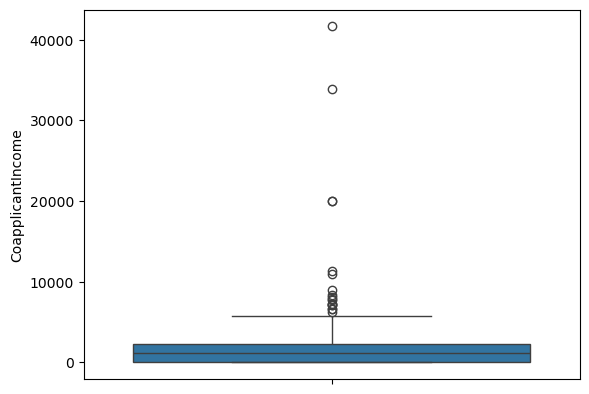

In [59]:
sns.boxplot(df['CoapplicantIncome'])

In [61]:
def outliers(col): 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3- q1
    ll = q1 - 1.5* iqr
    ul = q3 + 1.5* iqr
    return(ll, ul)

In [63]:
lower_limit , upper_limit= outliers('ApplicantIncome')
lower_limit , upper_limit

(-1498.75, 10171.25)

In [65]:
df[(df['ApplicantIncome']<lower_limit)|(df['ApplicantIncome']>upper_limit)].shape

(50, 12)

In [67]:
df.shape

(614, 12)

In [69]:
50/614

0.08143322475570032

In [71]:
df = df[(df['ApplicantIncome']>=lower_limit)&(df['ApplicantIncome']<=upper_limit)]
df.reset_index(drop=True, inplace=True)


In [73]:
df.shape

(564, 12)

In [75]:
lower_limit , upper_limit= outliers('CoapplicantIncome')
lower_limit , upper_limit

(-3505.5, 5842.5)

In [77]:
df[(df['CoapplicantIncome']<lower_limit)|(df['CoapplicantIncome']>upper_limit)].shape

(16, 12)

In [79]:
df.shape

(564, 12)

In [81]:
16/564

0.028368794326241134

In [83]:
df = df[(df['CoapplicantIncome']>=lower_limit)&(df['CoapplicantIncome']<=upper_limit)]
df.reset_index(drop=True, inplace=True)


In [85]:
df.shape

(548, 12)

<Axes: ylabel='LoanAmount'>

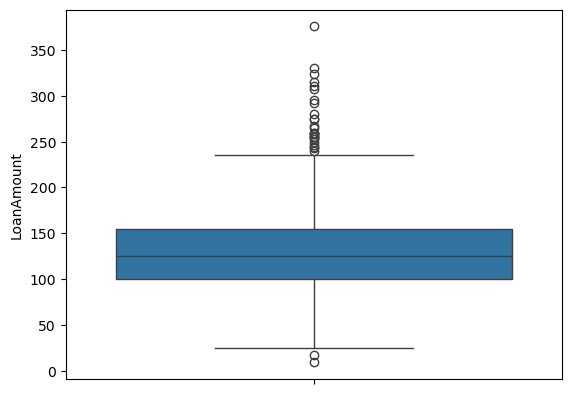

In [87]:
sns.boxplot(df['LoanAmount'])

In [89]:
lower_limit , upper_limit= outliers('LoanAmount')
lower_limit , upper_limit

(17.5, 237.5)

In [91]:
df[(df['LoanAmount']<lower_limit)|(df['LoanAmount']>upper_limit)].shape

(28, 12)

In [93]:
df.shape

(548, 12)

In [95]:
28/548

0.051094890510948905

In [97]:
df = df[(df['LoanAmount']>=lower_limit)&(df['LoanAmount']<=upper_limit)]
df.reset_index(drop=True, inplace=True)


In [99]:
df.shape

(520, 12)

In [102]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


### Data Standarization

In [106]:
from sklearn.preprocessing import StandardScaler

In [108]:
X = df.iloc[:, 0:-1]
Y = df['Loan_Status']

In [110]:
ss = StandardScaler()
df_feat = ss.fit_transform(X)
df_feat = pd.DataFrame(df_feat)

In [112]:
df_feat.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.4819,-1.351328,-0.714069,-0.580311,-0.357747,1.033643,-0.943785,0.552042,0.265776,0.416911,1.260624
1,0.4819,0.740013,0.297691,-0.580311,-0.357747,0.327548,0.136399,0.091120,0.265776,0.416911,-1.285102
2,0.4819,0.740013,-0.714069,-0.580311,2.795274,-0.555349,-0.943785,-1.460962,0.265776,0.416911,1.260624
3,0.4819,0.740013,-0.714069,1.723214,-0.357747,-0.787925,0.745256,-0.109148,0.265776,0.416911,1.260624
4,0.4819,-1.351328,-0.714069,-0.580311,-0.357747,1.117861,-0.943785,0.416557,0.265776,0.416911,1.260624


In [118]:
df_feat.columns = X.columns
df_feat.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.4819,-1.351328,-0.714069,-0.580311,-0.357747,1.033643,-0.943785,0.552042,0.265776,0.416911,1.260624
1,0.4819,0.740013,0.297691,-0.580311,-0.357747,0.327548,0.136399,0.091120,0.265776,0.416911,-1.285102
2,0.4819,0.740013,-0.714069,-0.580311,2.795274,-0.555349,-0.943785,-1.460962,0.265776,0.416911,1.260624


In [121]:
df['Loan_Status'].value_counts()/df.shape[0]

Loan_Status
1    0.696154
0    0.303846
Name: count, dtype: float64

### Train Test Split

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
xtrain , xtest, ytrain, ytest = train_test_split(df_feat, Y, test_size = 0.20,random_state=24,stratify=Y)

In [128]:
ytrain.value_counts()/ytrain.shape[0]

Loan_Status
1    0.697115
0    0.302885
Name: count, dtype: float64

## Model Training

In [131]:
from sklearn.linear_model import LogisticRegression

In [133]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [139]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
256,0.48190,0.740013,-0.714069,1.723214,-0.357747,-0.625066,0.309744,-0.484652,0.265776,0.416911,-0.012239
418,0.48190,-1.351328,-0.714069,-0.580311,-0.357747,-0.870470,-0.943785,-1.235659,0.265776,0.416911,1.260624
336,0.48190,0.740013,1.309450,1.723214,-0.357747,-1.116990,0.220207,-0.284384,-2.479992,0.416911,-0.012239
505,0.48190,0.740013,1.309450,1.723214,2.795274,1.331474,-0.227482,1.568101,0.265776,0.416911,-1.285102
201,-2.07512,-1.351328,0.297691,-0.580311,-0.357747,-0.102467,-0.943785,-0.309417,0.265776,0.416911,-1.285102


In [141]:
lr.coef_

array([[ 0.0546236 ,  0.21689073, -0.04188031, -0.22786943,  0.01822333,
         0.22792985,  0.24506835, -0.27953734,  0.01739926,  1.47673054,
         0.04962412]])

In [143]:
lr.intercept_

array([0.81030422])

In [145]:
pred1 = lr.predict(xtest)
pred1

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [147]:
probabilities = lr.predict_proba(xtest)
probabilities

array([[0.22595282, 0.77404718],
       [0.1762989 , 0.8237011 ],
       [0.94944052, 0.05055948],
       [0.19452878, 0.80547122],
       [0.21351569, 0.78648431],
       [0.94946251, 0.05053749],
       [0.20854293, 0.79145707],
       [0.33933051, 0.66066949],
       [0.1925369 , 0.8074631 ],
       [0.18114478, 0.81885522],
       [0.94997837, 0.05002163],
       [0.21214707, 0.78785293],
       [0.16581503, 0.83418497],
       [0.26755126, 0.73244874],
       [0.25761386, 0.74238614],
       [0.09963098, 0.90036902],
       [0.21586232, 0.78413768],
       [0.12477356, 0.87522644],
       [0.14267599, 0.85732401],
       [0.09047069, 0.90952931],
       [0.17316811, 0.82683189],
       [0.26253894, 0.73746106],
       [0.23640433, 0.76359567],
       [0.22158305, 0.77841695],
       [0.16510034, 0.83489966],
       [0.12525541, 0.87474459],
       [0.19626299, 0.80373701],
       [0.16897351, 0.83102649],
       [0.19890216, 0.80109784],
       [0.17773652, 0.82226348],
       [0.

In [149]:
probabilities[:,1]

array([0.77404718, 0.8237011 , 0.05055948, 0.80547122, 0.78648431,
       0.05053749, 0.79145707, 0.66066949, 0.8074631 , 0.81885522,
       0.05002163, 0.78785293, 0.83418497, 0.73244874, 0.74238614,
       0.90036902, 0.78413768, 0.87522644, 0.85732401, 0.90952931,
       0.82683189, 0.73746106, 0.76359567, 0.77841695, 0.83489966,
       0.87474459, 0.80373701, 0.83102649, 0.80109784, 0.82226348,
       0.88966113, 0.04033193, 0.70388339, 0.83091468, 0.68103801,
       0.83128163, 0.08012153, 0.03448142, 0.85243331, 0.86667   ,
       0.86055985, 0.86724257, 0.86050222, 0.71594787, 0.85231577,
       0.06214979, 0.78527996, 0.70223662, 0.81955285, 0.08059886,
       0.74806859, 0.0445909 , 0.81022525, 0.73542688, 0.75792566,
       0.77246668, 0.05395796, 0.86122191, 0.80737027, 0.79483833,
       0.87452577, 0.83278493, 0.06123954, 0.84953365, 0.84629796,
       0.72596101, 0.85319756, 0.67726284, 0.80635787, 0.8412395 ,
       0.07228022, 0.72753241, 0.77048719, 0.03492169, 0.73222

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [153]:
acc = accuracy_score(ytest, pred1)
pre = precision_score(ytest,pred1)
rec = recall_score(ytest,pred1)
print(acc, pre, rec)

0.8365384615384616 0.8235294117647058 0.9722222222222222


In [155]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        32
           1       0.82      0.97      0.89        72

    accuracy                           0.84       104
   macro avg       0.86      0.75      0.78       104
weighted avg       0.85      0.84      0.82       104



## Train different versions of Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression

In [160]:
lr_lasso = LogisticRegression(penalty='l1',solver='saga')
lr_none = LogisticRegression(penalty=None)

In [162]:
lr_lasso.fit(xtrain, ytrain)
lr_none.fit(xtrain, ytrain)

LogisticRegression(penalty=None)

In [164]:
pred_lasso = lr_lasso.predict(xtest)
pred_none = lr_none.predict(xtest)

In [166]:
acc_lasso = accuracy_score(ytest, pred_lasso)
acc_none = accuracy_score(ytest, pred_none)
acc_lasso,acc_none

(0.8365384615384616, 0.8365384615384616)